# Project: Investigate a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

> I selected TMDb movie dataset for this Data Analyst project. The original data from Kaggle was cleaned and considered for this analysis. AS per TMDb, it is a community built movie and TV database. This data set contains information about 10,000 movies, including user ratings and revenue data. 

### Details about Dataset

> TMDb movie dataset mainly contains attributes related to measure the successful movie and properties associated with success of movie. The attributes to measure the successful of movie are popularity,revenue and vote average. The metrics associated with the movie success are budget,cast,director,tagline,runtime,genres,production company and release date.

> As per [TMDb](https://developers.themoviedb.org/3/getting-started/popularity), the popularity is an cumulative factor considering Number of votes for the day, views for the day, users who marked it as a "favourite" for the day, users who added it to their "watchlist" for the day, release date, total votes and previous days score.

> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> After eyeing through the dataset, the following questions came into my mind. In this report,the answers for that questions were explored through systematic data analysis process.

### Research Questions to Explore

### Research Part 1: General Exploration

<li><a href="#Analysis 1">Analysis 1: Budget/Revenue Trend over the Period of Time</a></li>
<li><a href="#Analysis 2">Analysis 2: Popularity Trend over the Period of Time</a></li>
<li><a href="#Analysis 3">Analysis 3: Average Vote Trend over the Period of Time</a></li>
<li><a href="#Analysis 4">Analysis 4: Number of Movies Released Over the Time</a></li>
<li><a href="#Analysis 5">Analysis 5: Runtime Distribution of Movies</a></li>

<a id='research part 2a'></a>
### Research Part 2a (Quantitative Analyses): Properties associated with High Revenue Movies

<li><a href="#Question 1a">Research Question 1 (Which Revenue Level receives the highest popularity?)</a></li>
<li><a href="#Question 2a">Research Question 2 (Which Budget Level Receives the Highest Popularity?)</a></li>
<li><a href="#Question 3a">Research Question 3 (Which Runtime Level Receives the Highest Popularity?</a></li>
<li><a href="#Question 4a">Research Question 4 (Which Runtime Level Receives the Highest Avergae Voting?</a></li>

<a id='research part 2b'></a>
### Research Part 2b (Categorical Analyses): Properties associated with High Revenue Movies 

<li><a href="#Question 1b">Research Question 1 (Which Movies are Top 10 highest popularity?)</a></li>
<li><a href="#Question 2b">Research Question 2: (What kind of Genres are top in High Revenue movies?)</a></li>
<li><a href="#Question 3b">Research Question3: (Which Production Companies are top in Best Revenue movies?)</a></li>
<li><a href="#Question 4b">Research Question 4: (Which Actors are top in Best Revenue movies?)</a></li>
<li><a href="#Question 5b">Research Question 5: (Which directors are top in Best Revenue movies?)</a></li>
<li><a href="#Question 6b">Research Question 6: (Which keywords are top in Best Revenue movies?)¶</a></li>
<li><a href="#Question 7b">Research Question 7: (Which Genres are top during 60s and 2Ks Best Revenue movies?)¶</a></li>
<li><a href="#Question 8b">Research Question 8: (Which Keywords are top during 60s and 2Ks Best Revenue movies?)¶</a></li>



In [327]:
# importing all packages related to this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading Dataset

> First, we will read the data set for proceeding to investigate


In [328]:
# Loading data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> The above dataset looks perfect interms of formatting and column index names. There are some odd characters in the ‘cast’ column. I am going to leave them as it is. It also shows 21 columns in the dataset

### Exploring Dataset 

In [329]:
#   shape of the dataset
df.shape

(10866, 21)

> The dataset contains total of 10866 rows and 21 columns

In [330]:
# exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> The above information indicates types and number of non-null for all column index. After exploring the dataset, From the table above, there are totally 10866 entries and total 21 columns. And there exists some null value in the cast, director, overview and genres columns. But some columns are with a lot of null value rows like homepage, tagline, keywords and production_companies, especially the homepage and tagline columns are not required for this analysis,so I decided to drop homepage, tagline and keywords along with imdb_id. Column indexes such as cast, director and genres  are having few missing nonnull values. I decided to drop small quantity of null values in columns cast, director and genres

In [331]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> The above table shows the descriptive statistics information of the dataset. The popularity shows the outlier information. AS per [TMDb](https://developers.themoviedb.org/3/getting-started/popularity), the popularity is the cumulative number of favourites and number of watched list etc, since it has no upperbond, I decided to retain the original data. This table shows lot of "0" for budget, revenue, runtime, budget_adj and revenue_adj. Are those movies not released? But there is no minimum zero value in release year. So, I assume these values are missing values and not "real" values. In order to confirm this, I decided to find how many zeroes in those column indexes.

In [332]:
# finding how many zeroes in budget

df_budget_zero = df['budget'].value_counts()
df_budget_zero.head(2)


0           5696
20000000     190
Name: budget, dtype: int64

In [333]:
# filtering the zero in budget
df_budget_zero = df.query('budget == 0')
df_budget_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


> In order to confirm zeroes in budget, i quickly checked Mr. Holmes budget in the internet [wikipedia](https://en.wikipedia.org/wiki/Mr._Holmes#cite_note-2) and there is information for budget. So, I decided to assume missing values for all zero values in budget column and replace with "NaN"

In [334]:
# finding how many zeroes in revenue
df_revenue_zero = df['revenue'].value_counts()
df_revenue_zero.head(2)


0           6016
12000000      10
Name: revenue, dtype: int64

In [335]:
# filtering the zero in revenue
df_revenue_zero = df.query('revenue == 0')
df_revenue_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


> Similarly in order to confirm zeroes in revenue, i quickly checked wild card budget in the internet [wikipedia](https://en.wikipedia.org/wiki/Wild_Card_(2015_film)) and there is information for revenue. So, I decided to assume missing values for all zero values in budget column and replace with "NaN".

In [336]:
#count zero values in runtime data using groupby
df_runtime_count =  df.groupby('runtime').count()
df_runtime_count.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
runtime,,,,,,,,,,,,,,,,,,,,
0,31,31,31,31,31,31,31,6,29,5,15,29,30,13,31,31,31,31,31,31
2,5,5,5,5,5,5,1,2,5,0,3,5,4,2,5,5,5,5,5,5


In [337]:
# filtering the zero in revenue
df_runtime_zero = df.query('runtime == 0')
df_runtime_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


> The above table shows 31 rows of runtime has zero values. Because of small number i decided to drop zero values in runtime

### Data Cleaning

#### Summary of Actions

> Drop unnecessary columns: homepage, tagline, imdb_id, overview, budget_adj, revenue_adj.

> Drop duplicates

> Drop null values with small quantity of null values in column: cast, director and genres

> Replace zero values with "NaN" null values in columns: budget, revenue

> Drop zero values in column with small quantity: runtime


In [338]:
# drop imdb_id, homepage, tagline, overview, budget_adj, revenue_adj.
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis=1,inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [339]:
#sum of duplicates
sum(df.duplicated())

1

In [340]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [341]:
#drop the null values in cast, director, genres columns
cal2 = ['cast', 'director', 'genres']
df.dropna(subset = cal2, how='any', inplace=True)

In [342]:
# check if nulls are dropped.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [343]:
# directly filter the runtime data with nonzero value
df.query('runtime != "0"', inplace=True)
#check
df.query('runtime == "0"')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [344]:
#replace zero values with null values in the budget and revenue column.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# check if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


In [345]:
# check number of unique values 
df.nunique()

id                      10703
popularity              10657
budget                    551
revenue                  4697
original_title          10412
cast                    10638
director                 5001
keywords                 8740
runtime                   242
genres                   2019
production_companies     7398
release_date             5869
vote_count               1289
vote_average               70
release_year               56
dtype: int64

In [346]:
# column, row information after cleaning data
df.shape

(10703, 15)

In [347]:
# Descriptive Statistics information after cleaning data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> From table above shows the final statistics data info after transfer all zero values to null values in `budget` and `revenue` data. Now budget and revenue colums have some value without zero values accumulation. After deleting the zero values from runtime, the minimum value of runtime looks better. Budget and revenue columns minimum values are 1.0 dollar. This looks suspicious. When i lokeed into the data, i noticed small number of data has budget values ranging from 1 dollar to 100 dollar. Because of small quantity, i leave as it is.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Part 1: General Exploration

<li><a href="#Analysis 1">Analysis 1: Budget/Revenue Trend over the Period of Time</a></li>
<li><a href="#Analysis 2">Analysis 2: Popularity Trend over the Period of Time</a></li>
<li><a href="#Analysis 3">Analysis 3: Average Vote Trend over the Period of Time</a></li>
<li><a href="#Analysis 4">Analysis 4: Number of Movies Released Over the Time</a></li>
<li><a href="#Analysis 5">Analysis 5: Runtime Distribution of Movies</a></li>

<a id='research part 2a'></a>
### Research Part 2a (Quantitative Analyses): Properties associated with High Revenue Movies

<li><a href="#Question 1a">Research Question 1 (Which Revenue Level receives the highest popularity?)</a></li>
<li><a href="#Question 2a">Research Question 2 (Which Budget Level Receives the Highest Popularity?)</a></li>
<li><a href="#Question 3a">Research Question 3 (Which Runtime Level Receives the Highest Popularity?</a></li>
<li><a href="#Question 4a">Research Question 4 (Which Runtime Level Receives the Highest Avergae Voting?</a></li>

<a id='research part 2b'></a>
### Research Part 2b (Categorical Analyses): Properties associated with High Revenue Movies 

<li><a href="#Question 1b">Research Question 1 (Which Movies are Top 10 highest popularity?)</a></li>
<li><a href="#Question 2b">Research Question 2: (What kind of Genres are top in High Revenue movies?)</a></li>
<li><a href="#Question 3b">Research Question3: (Which Production Companies are top in Best Revenue movies?)</a></li>
<li><a href="#Question 4b">Research Question 4: (Which Actors are top in Best Revenue movies?)</a></li>
<li><a href="#Question 5b">Research Question 5: (Which directors are top in Best Revenue movies?)</a></li>
<li><a href="#Question 6b">Research Question 6: (Which keywords are top in Best Revenue movies?)¶</a></li>
<li><a href="#Question 7b">Research Question 7: (Which Genres are top during 60s and 2Ks Best Revenue movies?)¶</a></li>
<li><a href="#Question 8b">Research Question 8: (Which Keywords are top during 60s and 2Ks Best Revenue movies?)¶</a></li>





## Research Part 1: General Exploration

> In this part, the general trend of various attributes over the period of time were analysed.   

<a id='Analysis 1'></a>

### Analysis 1: Budget/Revenue Trend over the Period of Time

> Below plot shows the mean Budget and Revenue price trend over the periof of time. Budget increased over the period of time. Particularly from 1995 onwards, budget of the movie were increased double. Similarly revenue also increased over the period of time. 

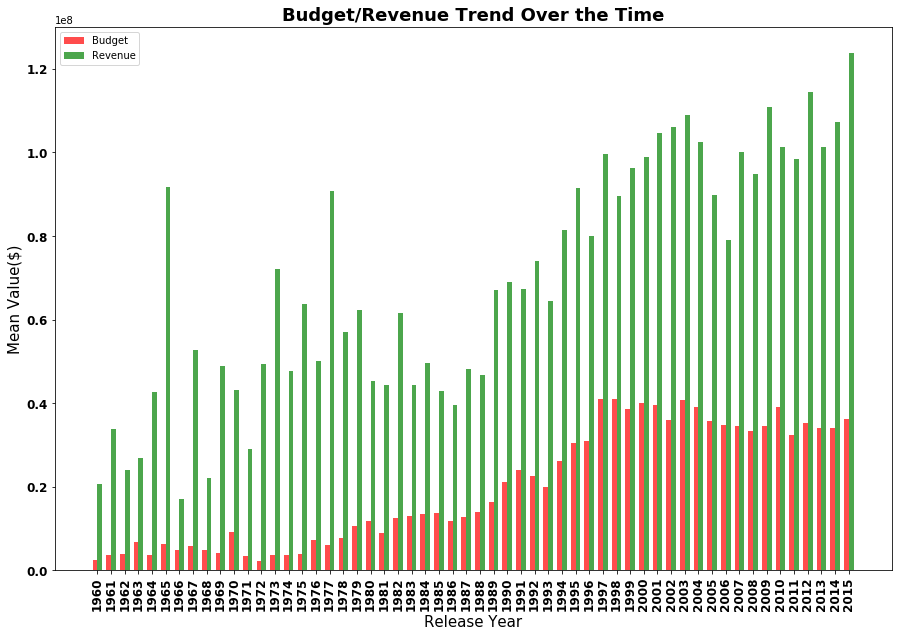

In [348]:
# plotting parameters
rc_fonts = {'figure.figsize': (15, 10)}
matplotlib.rcParams.update(rc_fonts)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')

# the width of the bars
width = 0.35       

# plot bars
df_budget = df.groupby(['release_year']).mean().budget
df_revenue = df.groupby(['release_year']).mean().revenue
df_release_year = df['release_year'].unique()
df_release_year.sort()
ind = np.arange(len(df_budget))  
budget_bars = plt.bar(ind, df_budget, width, color='r', alpha=.7, label='Budget')
revenue_bars = plt.bar(ind + width, df_revenue, width, color='g', alpha=.7, label='Revenue')

# title and labels
plt.ylabel('Mean Value($)',fontsize=15)
plt.xlabel('Release Year',fontsize=15)
plt.title('Budget/Revenue Trend Over the Time',fontsize=18,weight='bold')
locations = ind + width / 2  # xtick locations
labels = df_release_year  # xtick labels
plt.xticks(locations,labels)
plt.legend(loc='upper left')


# legend
plt.show()




<a id='Analysis 2'></a>
### Analysis 2: Popularity Trend over the Period of Time

> The mean popularity trend over the period of time plot is shown below. The popularity score does not have upper limit, hence the mean value is affected by outlier which is reflected in 2015. Overall the mean popularity increases slowly with time. It is due to number of people watching movies and voting from various sources increased over the period of time. 

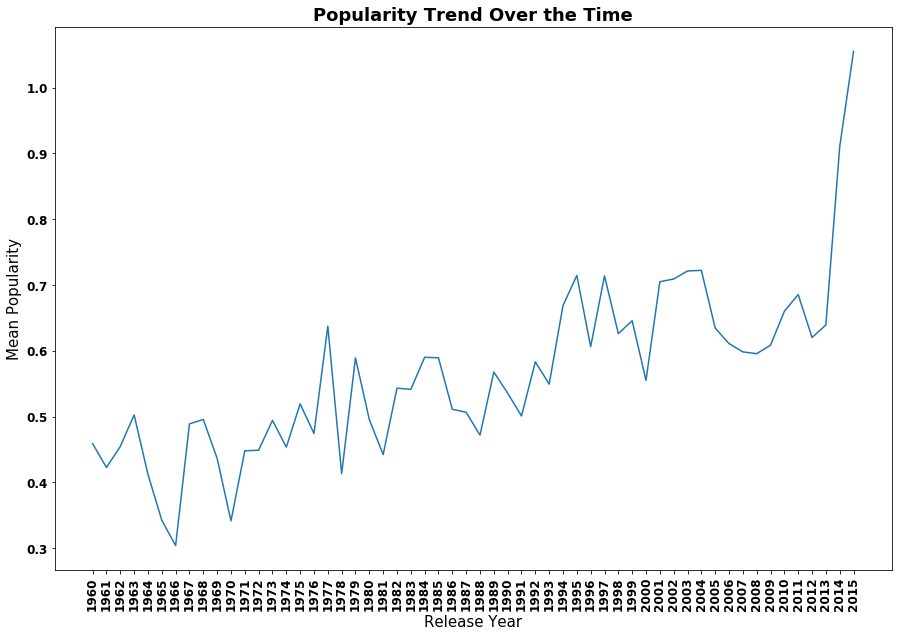

In [349]:
# plotting parameters
rc_fonts = {'figure.figsize': (15, 10)}
matplotlib.rcParams.update(rc_fonts)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55])
my_xticks= df['release_year'].unique()
my_xticks.sort()
y = df.groupby(['release_year']).mean().popularity

plt.xticks(x, my_xticks,fontsize = 12, weight='bold')
plt.title('Popularity Trend Over the Time',fontsize =18,weight='bold')
plt.ylabel('Mean Popularity',fontsize=15)
plt.xlabel('Release Year',fontsize=15)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')


plt.plot(x, y);



<a id='Analysis 3'></a>
### Analysis 3: Average Vote Trend over the Period of Time

> Surprisingly the average vote trend is decreasing slowly over the period of time. AS per [IMDb](https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK#), the vote average is the weighted average and not raw vote average. Various filters are applied to the raw data in order to eliminate and reduce attempts at vote stuffing by people more interested in changing the current rating of a movie than giving their true opinion of it. The Reason for the decreasing trend may be due to applying strict filter to the vote average over the period of time inorder to get accurate average vote 

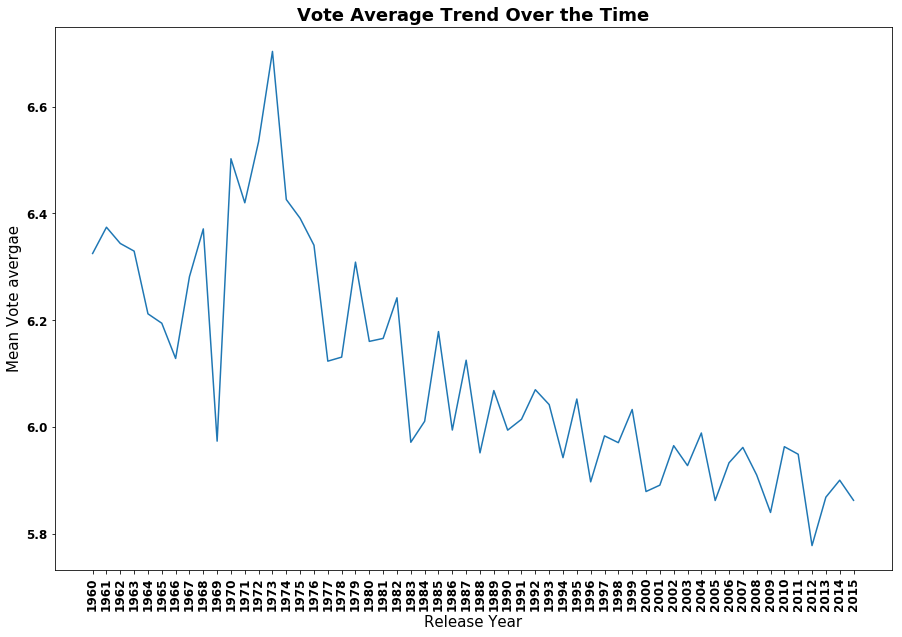

In [350]:
#  plotting parameters
rc_fonts = {'figure.figsize': (15, 10)}
matplotlib.rcParams.update(rc_fonts)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55])
my_xticks= df['release_year'].unique()
my_xticks.sort()
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')


y = df.groupby(['release_year']).mean().vote_average

plt.xticks(x, my_xticks,fontsize = 12, weight='bold')
plt.title('Vote Average Trend Over the Time',fontsize=18,weight='bold')
plt.ylabel('Mean Vote avergae',fontsize = 15)
plt.xlabel('Release Year',fontsize=15)

plt.plot(x, y);


<a id='Analysis 4'></a>
### Analysis 4: Number of Movies Released Over the Time

> Below plot indicates the drastic increase in number of movies released over the period of time. During economic downtime, the number of movies released were less and it is reflected in the chart. After 2005, the number of movies released were so high compared to 60s to 90s.This may be due to growth in economy and increase in number of people watching movies through different platforms all over the world. 

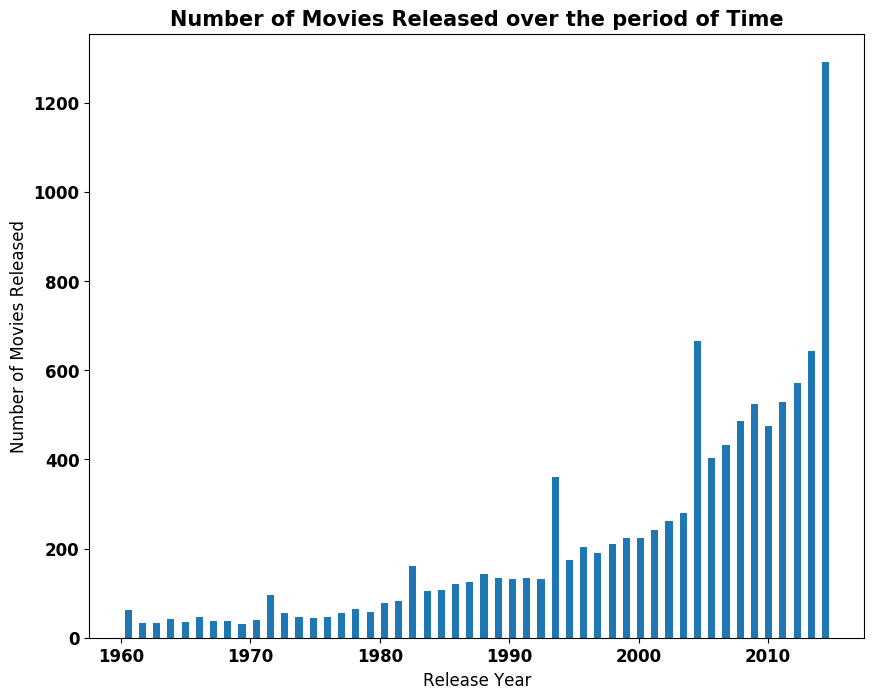

In [351]:
#plotting a histogram of runtime of movies
rc_fonts = {'figure.figsize': (15, 10)}
#giving the figure size(width, height)
plt.figure(figsize=(10,8), dpi = 100)
#x-axis label name
plt.xlabel('Release Year', fontsize = 12)
#y-axis label name
plt.ylabel('Number of Movies Released', fontsize=12)
#title of the graph
plt.title('Number of Movies Released over the period of Time', fontsize=15, weight='bold')

plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')


#giving a histogram plot
plt.hist(df['release_year'], rwidth = 0.5, bins =50)
#displays the plot
plt.show()

<a id='Analysis 5'></a>
### Analysis 5: Runtime Distribution of Movies

> Below plot shows the bell curve distribution for the runtime. Statistical correlations for runtime are tabulated below. The mean runtime is 103 min which is shown in the plot. Maximum number of movies are produced with mean runtime of 103 min.

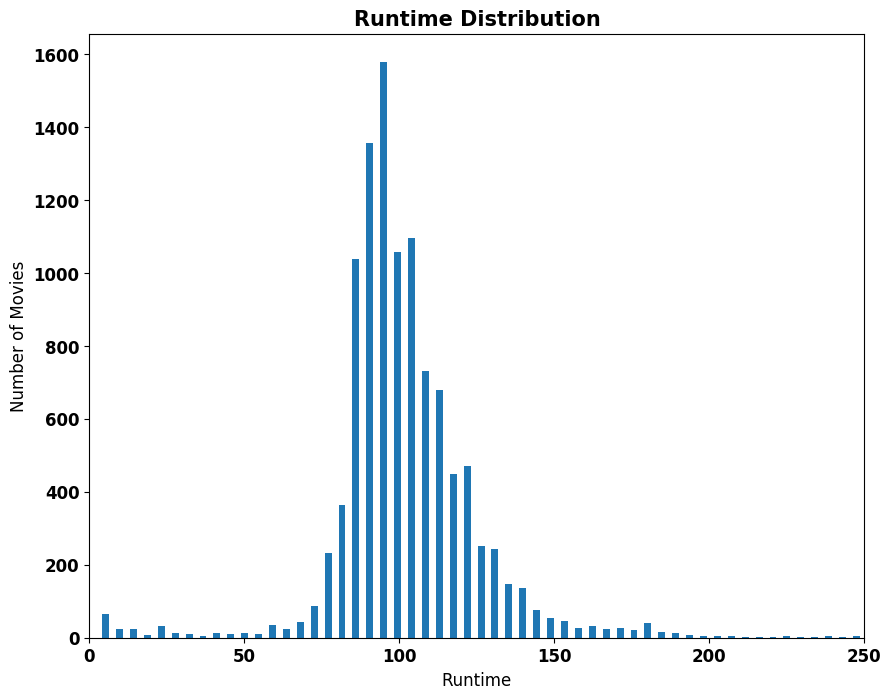

count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [352]:
#plotting a histogram of runtime of movies
rc_fonts = {'figure.figsize': (15, 10)}
#giving the figure size(width, height)
plt.figure(figsize=(10,8), dpi = 100)
#x-axis label name
plt.xlabel('Runtime', fontsize = 12)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=12)
#title of the graph
plt.title('Runtime Distribution', fontsize=15, weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xlim(0,250)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.5, bins =200)
#displays the plot
plt.show()
# descriptive statistical information for runtime
df['runtime'].describe()

<a id='Research Part 2a'></a>
## Research Part 2a (Quantitative Analyses): Properties associated with High Revenue Movies 

> IN order to find the associated properties  for high revenue movies, two things need to be considered. One is quantitative analyses and other one is categorical analyses. In quantitative analyses, BUdget and runtime key factors are considered for the quantification of popularity and vote average for the successful movies. 

> NOw we will see how BUdget and runtime key factors are associated with successful movies.

<a id='Question 1a'></a>
### Research Question 1 (Which Revenue Level receives the highest popularity?)

> In order to determine the differnt revenue levels to categorize, pandas describe function is used to get the statistical properties. min, 25%, 50%, 75%, max revenue values were shown below.

> The revenue levers were categorized based on min,25%,50%,75% and max revenue value. 

>Below chart shows the mean popularity for different Revenue levels. HIgh revenue movies are in high popularity level compared to low reveue movies. 

In [353]:
# View the min, 25%, 50%, 75%, max revenue values with Pandas describe
df.describe().revenue

count    4.843000e+03
mean     8.933981e+07
std      1.621546e+08
min      2.000000e+00
25%      7.779664e+06
50%      3.191160e+07
75%      1.000000e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [354]:
df.median().revenue

31911598.0

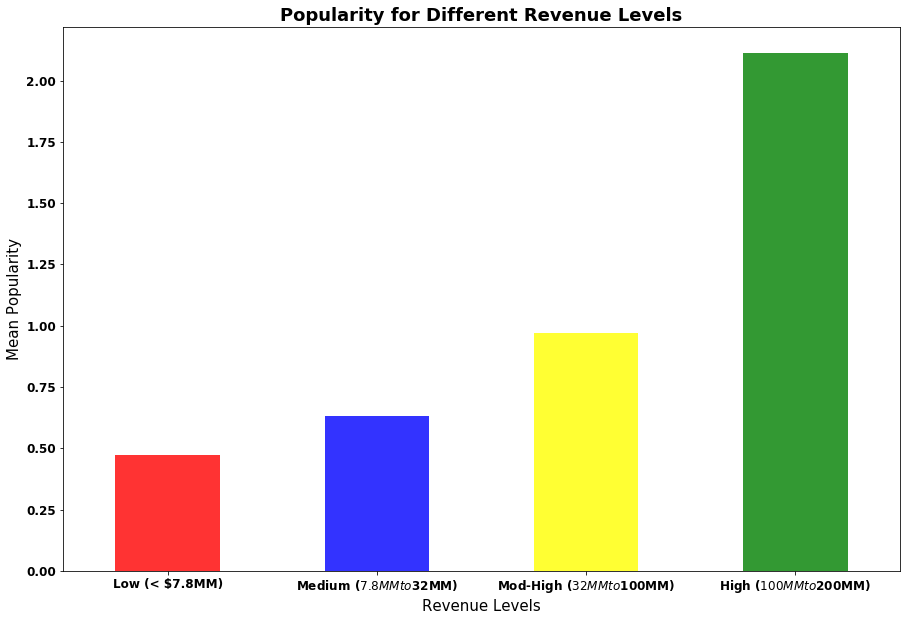

In [355]:
# plotting parameters
rc_fonts = {'figure.figsize': (15, 10)}
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.00, 7.8e+06, 3.2e+07, 1.0e+08, 2.8e+09]

# Labels for the four revenue level groups
bin_names = ['Low (< $7.8MM)', 'Medium ($7.8MM to $32MM)', 'Mod-High ($32MM to $100MM)', 'High ($100MM to $200MM)']

# Creates arevenue_levels column
df['Revenue_Levels'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)


#plotting
colors=('red','blue', 'yellow', 'green')
x= df.groupby('Revenue_Levels').mean().popularity
x.plot(kind = 'bar',alpha=0.8,color=colors)
plt.xlabel('Revenue Levels', fontsize=15)
plt.ylabel('Mean Popularity',fontsize=15)
plt.title('Popularity for Different Revenue Levels',fontsize = 18,weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.show()



<a id='Question 2a'></a>
### Research Question 2  (Which Budget Level Receives the Highest Popularity?)

> In order to determine the differnt budget levels to categorize, pandas describe function is used to get the statistical properties. min, 25%, 50%, 75%, max budget values were shown below.

> The budget levels were categorized based on min,25%,50%,75% and max budget value. 

>Below chart shows the mean popularity for different budget levels. As in the case of Revenue case, here also, the HIgh budget movies are in high popularity level compared to low budget movies. 

In [356]:
# View the min, 25%, 50%, 75%, max budget values with Pandas describe
df.describe().budget

count    5.150000e+03
mean     3.084401e+07
std      3.893782e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.750000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

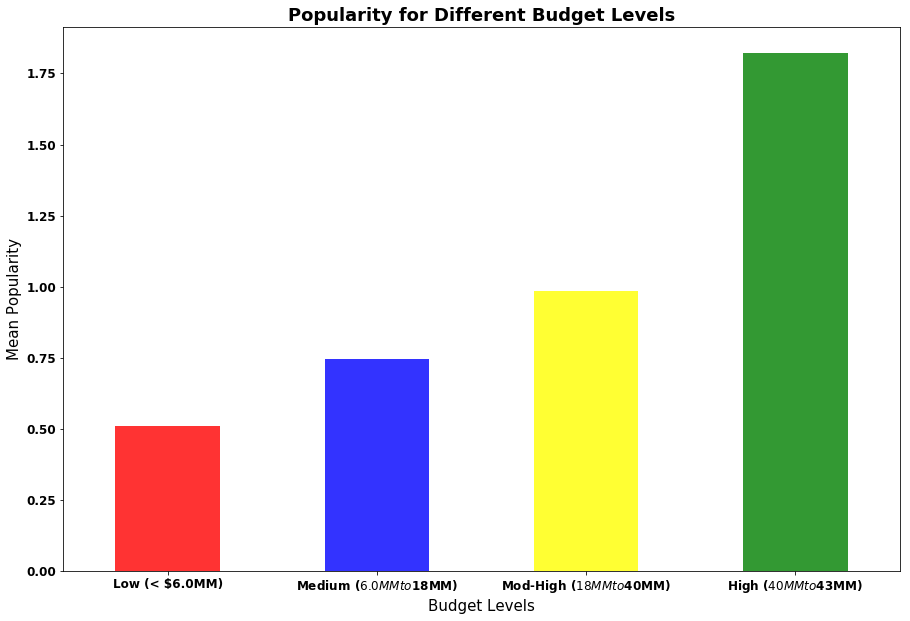

In [357]:

rc_fonts = {'figure.figsize': (15, 10)}



# Bin edges that will be used to "cut" the data into groups
bin_edges = [1.00, 6.0e+06, 1.8e+07, 4.0e+07, 4.3e+08]

# Labels for the four budget level groups
bin_names = ['Low (< $6.0MM)', 'Medium ($6.0MM to $18MM)', 'Mod-High ($18MM to $40MM)', 'High ($40MM to $43MM)']

# Creates budget column
df['Budget_Levels'] = pd.cut(df['budget'], bin_edges, labels=bin_names)

#plotting
colors=('red','blue', 'yellow', 'green')
x= df.groupby('Budget_Levels').mean().popularity
x.plot(kind='bar',alpha=0.8,color = colors)
plt.xlabel('Budget Levels', fontsize=15)
plt.ylabel('Mean Popularity',fontsize=15)
plt.title('Popularity for Different Budget Levels',fontsize = 18,weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xticks(rotation=0,weight='bold')
plt.show()

<a id='Question 3a'></a>
### Research Question 3 (Which Runtime Level Receives the Highest Popularity?

> In order to determine the differnt runtime levels to categorize, pandas describe function is used to get the statistical properties. min, 25%, 50%, 75%, max runtime values were shown below.

> The runtime levels were categorized based on min,25%,50%,75% and max runtime value. 

>Below chart shows the mean popularity for different runtime levels. As in the case of Revenue, budget cases, here also, the HIgh runtime movies are in high popularity level compared to low runtime movies. 


In [358]:
# View the min, 25%, 50%, 75%, max runtime values with Pandas describe
df.describe().runtime

count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

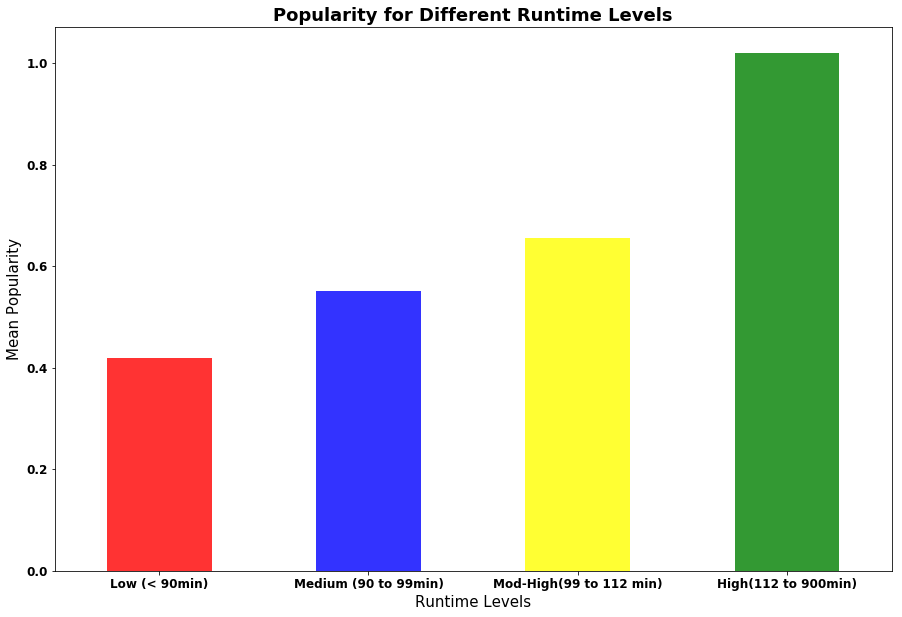

In [359]:
rc_fonts = {'figure.figsize': (15, 10)}

# Bin edges that will be used to "cut" the data into groups
bin_edges = [3.0, 90.0, 99.0, 112, 900.0]

# Labels for the four runtime level groups
bin_names = ['Low (< 90min)', 'Medium (90 to 99min)', 'Mod-High(99 to 112 min)', 'High(112 to 900min)']

# Creates runtime_levels column
df['Runtime_Levels'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

# plotting
colors=('red','blue', 'yellow', 'green')
x= df.groupby('Runtime_Levels').mean().popularity
x.plot(kind='bar',alpha=0.8,color=colors)
plt.xlabel('Runtime Levels', fontsize=15)
plt.ylabel('Mean Popularity',fontsize=15)
plt.title('Popularity for Different Runtime Levels',fontsize = 18,weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xticks(rotation=0,weight='bold')
plt.show()

<a id='Question 4a'></a>
### Research Question 4 (Which Revenue Level Receives the Highest Avergae Voting?

> In order to determine the differnt revenue levels to categorize, pandas describe function is used to get the statistical properties. min, 25%, 50%, 75%, max revenue values were shown below.

> The revenue levels were categorized based on min,25%,50%,75% and max revenue value. 

>Below chart shows the mean vote average for different Revenue levels. Surprisingly, all revenue levels are in same vote average. As we discussed earlier, this may be due to implication of strict filter in the voting avergae calculation system over the period of time. 


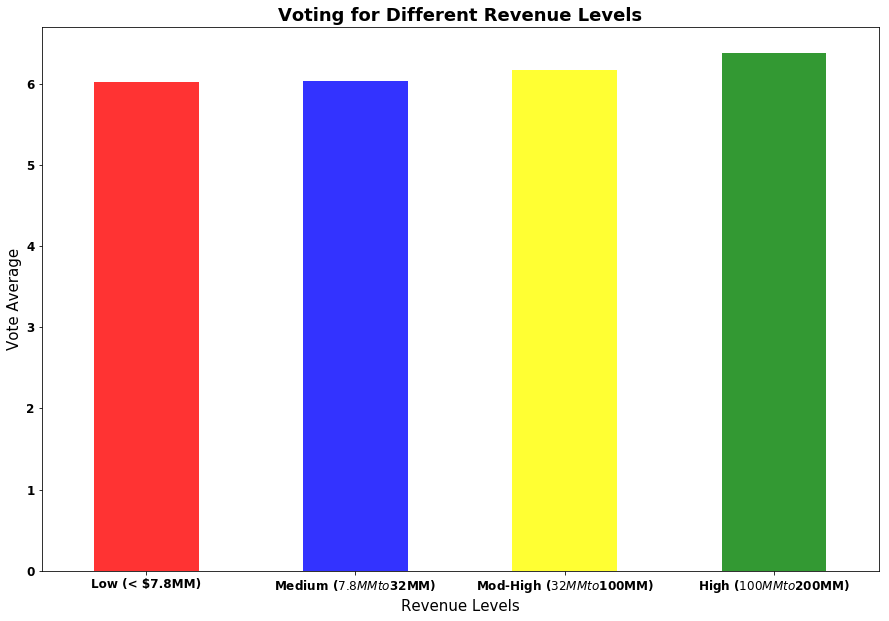

In [360]:
# plotting
colors=('red','blue', 'yellow', 'green')
data= df.groupby('Revenue_Levels').mean().vote_average
data.plot(kind='bar',alpha=0.8,color = colors)
plt.xlabel('Revenue Levels', fontsize=15)
plt.ylabel('Vote Average',fontsize=15)
plt.title('Voting for Different Revenue Levels',fontsize=18,weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xticks(rotation=0)
plt.show()

> Based on the above analyses, the popular movies are largely associated with high BUdget movies and the runtime of movies.  

<a id='Question 4a'></a>
### Research Question 4 (Which Runtime Level Receives the Highest Avergae Voting?


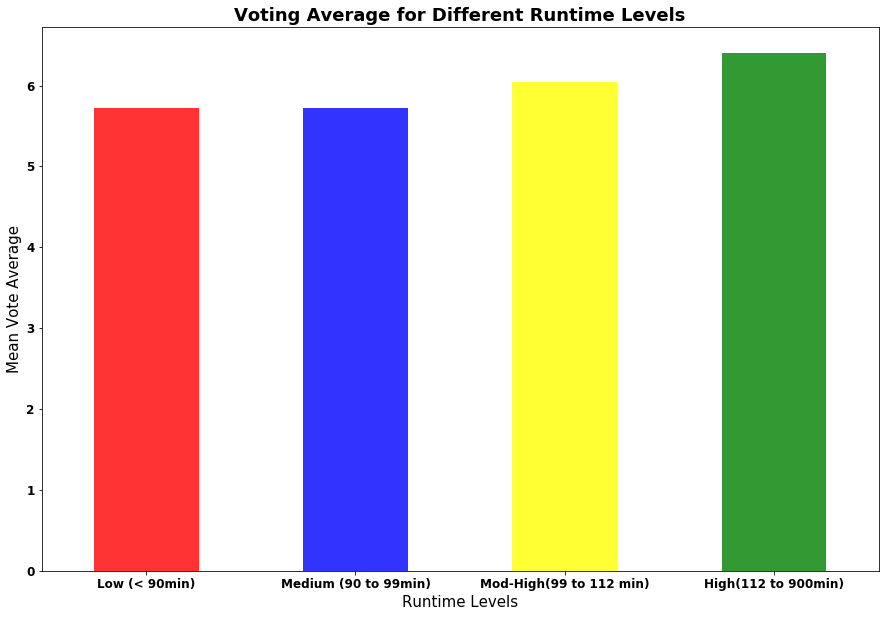

In [361]:
rc_fonts = {'figure.figsize': (15, 10)}

# Bin edges that will be used to "cut" the data into groups
bin_edges = [3.0, 90.0, 99.0, 112, 900.0]

# Labels for the four runtime level groups
bin_names = ['Low (< 90min)', 'Medium (90 to 99min)', 'Mod-High(99 to 112 min)', 'High(112 to 900min)']

# Creates runtime_levels column
df['Runtime_Levels'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

# plotting
colors=('red','blue', 'yellow', 'green')
x= df.groupby('Runtime_Levels').mean().vote_average
x.plot(kind='bar',alpha=0.8,color = colors)
plt.xlabel('Runtime Levels', fontsize=15)
plt.ylabel('Mean Vote Average',fontsize=15)
plt.title('Voting Average for Different Runtime Levels',fontsize = 18,weight='bold')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xticks(rotation=0,weight='bold')
plt.show()

The above chart shows voting average for different runtime levels. HIgh runtime has high voting average compared to low runtime movies

In [362]:
# adding year levels
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1960, 1970, 1980, 1990, 2000, 2015]

# Labels for the four budget level groups
bin_names = ['60s', '70s', '80s', '90s','2Ks']

# Creates runtime_levels column
df['Year_Levels'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)


<a id='Research Part 2b'></a>
## Research Part 2b (Categorical Analyses): Properties associated with High Revenue Movies 

> IN this part, we will analyse catregorical keyfactors associated with high revenue movies. The categorical analyses include cast,director, genres, keywords and producer for the successful movies. 

> NOw we will see how these categorical key factors are associated with successful movies.

<a id='Question 1b'></a>
### Research Question 1 (Which Movies are Top 10 highest popularity?)

#### Collection of Best Movies Dataset

> IN order to find top movies with highest revenue, i decided to extract data having revenue greater than or equal to 90 Million dollar. The reason for that number is from earlier analyses, the high revenue levels are associated with high popularity. Hence i decided to sort out data based on high level (ie > 90 million dollar). Then the dataframe was sorted out based on high popularity


In [363]:
# extracting data with revenue >= $90M
profit_movie_data = df[df['revenue'] >= 90000000]

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))

#initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1
best_movies= profit_movie_data.sort_values(by='popularity', ascending=False)
#print(type(best_movies))
best_movies.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Revenue_Levels,Budget_Levels,Runtime_Levels,Year_Levels
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
2,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
64,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
65,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
3,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
66,100402,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,3848,7.6,2014,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
133,11,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,High ($100MM to $200MM),Medium ($6.0MM to $18MM),High(112 to 900min),70s
4,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
67,131631,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,resistance|post-apocalyptic|dystopia|war|sequel,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,11/18/14,3590,6.6,2014,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks
68,122917,10.174599,250000000.0,9.551198e+08,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,corruption|elves|dwarves|orcs|middle-earth (to...,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,12/10/14,3110,7.1,2014,High ($100MM to $200MM),High ($40MM to $43MM),High(112 to 900min),2Ks


> The above table shows top 10 movies dataset with revenue greater than or equal to 90 million dollar and high popularity. We will do more analyses based on this extracted dataset

### Collection of Worst Movies Dataset 

>IN order to find worst movies with low revenue, i decided to extract data having revenue less than or equal to 7.8 Million dollar. The reason for that number is from earlier analyses, the low revenue levels are associated with low popularity. Hence i decided to sort out data based on low level (ie > 7.8 million dollar).Then the dataframe was sorted out based on low popularity


In [364]:
# extracting data with revenue <= $7.8M
worst_profit_movie_data = df[df['revenue'] <= 7800000]

#reindexing new dataframe
worst_profit_movie_data.index = range(len(worst_profit_movie_data))
#initialize dataframe from 1 instead of 0
worst_profit_movie_data.index = worst_profit_movie_data.index + 1
worst_movies= worst_profit_movie_data.sort_values(by='popularity', ascending=True)

worst_movies.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Revenue_Levels,Budget_Levels,Runtime_Levels,Year_Levels
859,1392,0.001117,350000.0,3515061.0,Born into Brothels,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,Zana Briski|Ross Kauffman,prostitute|red-light disctrict|human trafficki...,85,Documentary,NaN,12/8/04,23,6.4,2004,Low (< $7.8MM),Low (< $6.0MM),Low (< 90min),2Ks
594,124067,0.001783,NaN,273747.0,The Central Park Five,Antron McCray|Kevin Richardson|Yusef Salaam|Ra...,Sarah Burns|Ken Burns,prison|police|rapist|wrongful arrest|serial ra...,119,Documentary,Florentine Films|WETA,5/24/12,22,6.4,2012,Low (< $7.8MM),NaN,High(112 to 900min),2Ks
393,33295,0.005391,NaN,887029.0,More Than a Game,LeBron James|Romeo Travis|Sian Cotton|Willie M...,Kristopher Belman,sport|high school|basketball|high school baske...,105,Documentary|Family,Harvey Mason Media,9/6/08,10,6.4,2008,Low (< $7.8MM),NaN,Mod-High(99 to 112 min),2Ks
731,173455,0.006115,NaN,137460.0,Mistaken for Strangers,Matt Berninger|Tom Berninger|Aaron Dessner|Bry...,Tom Berninger,NaN,75,Documentary|Music,Final Frame|C5,9/19/13,14,7.4,2013,Low (< $7.8MM),NaN,Low (< 90min),2Ks
858,1843,0.006346,NaN,127067.0,DiG!,The Dandy Warhols|The Brian Jonestown Massacre...,Ondi Timoner,bus|junkie|heroin|career|musical,107,Documentary|Music,NaN,5/14/04,12,6.8,2004,Low (< $7.8MM),NaN,Mod-High(99 to 112 min),2Ks
913,15651,0.006681,NaN,312751.0,For the Bible Tells Me So,Imogene Robinson|Victor Robinson|Gene Robinson...,Daniel G. Karslake,bible|homosexuality|lesbian|religion,98,Documentary,NaN,10/5/07,10,6.1,2007,Low (< $7.8MM),NaN,Medium (90 to 99min),2Ks
730,193524,0.015722,NaN,729043.0,The Stone Roses: Made of Stone,Ian Brown|Gary 'Mani' Mounfield|John Squire|Al...,Shane Meadows,NaN,96,Documentary,NaN,5/28/13,10,6.0,2013,Low (< $7.8MM),NaN,Medium (90 to 99min),2Ks
1011,36047,0.015997,15000000.0,5217498.0,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,woman director,105,Thriller,Warner Bros. Pictures,7/19/00,12,5.2,2000,Low (< $7.8MM),Medium ($6.0MM to $18MM),Mod-High(99 to 112 min),90s
74,339928,0.017625,NaN,732655.0,Once I Was a Beehive,Paris Warner|Lisa Clark|Hailey Smith|Clare Nie...,Maclain Nelson,NaN,119,Comedy|Drama|Family,Escapology|Main Dog Productions,8/14/15,10,6.5,2015,Low (< $7.8MM),NaN,High(112 to 900min),2Ks
496,29047,0.017708,40000.0,1434436.0,The Kid Stays in the Picture,Robert Evans|Eddie Albert|Francis Ford Coppola...,Nanette Burstein|Brett Morgen,cocaine|arranged marriage|love|hollywood|woman...,93,Documentary,Ministry of Propaganda Films|Woodland Pictures...,1/18/02,10,7.4,2002,Low (< $7.8MM),Low (< $6.0MM),Medium (90 to 99min),2Ks


> The above table shows 10 movies dataset with low revenue and low popularity. We will do more categorical analyses based on this extracted dataset. 

#### Top 10 movies with high popularity in High revenue movies 

In [365]:
#showing the top 10 movies original title
#best_movies['original_title'].head(10)
best_movies.iloc[:11,np.r_[1:2,4:8,9:11,13:15]]

,popularity,original_title,cast,director,keywords,genres,production_companies,vote_average,release_year
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
2,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
64,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,8.0,2014
65,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7.9,2014
3,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
66,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,Action|Adventure|Science Fiction,Marvel Studios,7.6,2014
133,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977
4,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
67,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,resistance|post-apocalyptic|dystopia|war|sequel,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,6.6,2014
68,10.174599,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,corruption|elves|dwarves|orcs|middle-earth (to...,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,7.1,2014


#### Top 10 movies with low popularity in low revenue movies

In [366]:
#showing the top 10 movies wih low revenue
worst_movies.iloc[:11,np.r_[1:2,4:8,9:11,13:15]]

,popularity,original_title,cast,director,keywords,genres,production_companies,vote_average,release_year
859,0.001117,Born into Brothels,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,Zana Briski|Ross Kauffman,prostitute|red-light disctrict|human trafficki...,Documentary,NaN,6.4,2004
594,0.001783,The Central Park Five,Antron McCray|Kevin Richardson|Yusef Salaam|Ra...,Sarah Burns|Ken Burns,prison|police|rapist|wrongful arrest|serial ra...,Documentary,Florentine Films|WETA,6.4,2012
393,0.005391,More Than a Game,LeBron James|Romeo Travis|Sian Cotton|Willie M...,Kristopher Belman,sport|high school|basketball|high school baske...,Documentary|Family,Harvey Mason Media,6.4,2008
731,0.006115,Mistaken for Strangers,Matt Berninger|Tom Berninger|Aaron Dessner|Bry...,Tom Berninger,NaN,Documentary|Music,Final Frame|C5,7.4,2013
858,0.006346,DiG!,The Dandy Warhols|The Brian Jonestown Massacre...,Ondi Timoner,bus|junkie|heroin|career|musical,Documentary|Music,NaN,6.8,2004
913,0.006681,For the Bible Tells Me So,Imogene Robinson|Victor Robinson|Gene Robinson...,Daniel G. Karslake,bible|homosexuality|lesbian|religion,Documentary,NaN,6.1,2007
730,0.015722,The Stone Roses: Made of Stone,Ian Brown|Gary 'Mani' Mounfield|John Squire|Al...,Shane Meadows,NaN,Documentary,NaN,6.0,2013
1011,0.015997,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,woman director,Thriller,Warner Bros. Pictures,5.2,2000
74,0.017625,Once I Was a Beehive,Paris Warner|Lisa Clark|Hailey Smith|Clare Nie...,Maclain Nelson,NaN,Comedy|Drama|Family,Escapology|Main Dog Productions,6.5,2015
496,0.017708,The Kid Stays in the Picture,Robert Evans|Eddie Albert|Francis Ford Coppola...,Nanette Burstein|Brett Morgen,cocaine|arranged marriage|love|hollywood|woman...,Documentary,Ministry of Propaganda Films|Woodland Pictures...,7.4,2002


Above tables show top 10 movies, director, cast, keywords, genres, production companies,vote average and release year with high/low revenue and high/low popularity. As we can see in the dataset, attributes cast,keywords and production companies have special character '|'. It needs to be splitted. 
We will see how we can do this

#### Splitting String data in dataset

> Splitting string data is done for the dataset with high revenue (i.e > 90 million dollar

> Splitting string data is done for the dataset with low revenue (i.e < 7.8 million doallar)

In [367]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_movie_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [368]:
#function which will take any column as argument from and keep its track 
def data_worst(column):
    #will take a column, and separate the string by '|'
    data_worst = worst_profit_movie_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_worst = pd.Series(data_worst.split('|'))
    
    #arranging in descending order
    count = data_worst.value_counts(ascending = False)
    
    return count

#### Top Genres in HIgh revenue movies

In [369]:
# Top genres in best MOvies 
genr = data('genres')
genr.sort_values(ascending = False, inplace = True)
genr.head()



Comedy       487
Action       485
Drama        457
Adventure    407
Thriller     389
dtype: int64

#### Less popular genres in low revenue movies

In [370]:
# Less popular genres in best movies 
genr_worst = data_worst('genres')
genr_worst.sort_values(ascending = False, inplace = True)
genr_worst.tail()

Animation    36
History      29
War          27
Foreign      19
Western      19
dtype: int64

#### Top directors in HIgh revenue movies

In [371]:
# top directors in best movies
director = data('director')
director.sort_values(ascending = False, inplace = True)
director.head()

Steven Spielberg    23
Robert Zemeckis     12
Ron Howard          12
Clint Eastwood      11
Tim Burton          11
dtype: int64

#### Less Popular directors in Low revenue movies

In [372]:
# less popular directors in best movies
director_worst = data_worst('director')
director_worst.sort_values(ascending = False, inplace = True)
director_worst.tail()

Rob Zombie                1
Marvin Kren               1
Henry Bean                1
Lancelot Oduwa Imasuen    1
Ãlex de la Iglesia        1
dtype: int64

#### Top actors in HIgh revenue movies

In [373]:
# top actors in best movies
casts = data('cast')
casts.sort_values(ascending = False, inplace = True)
casts.head()

Tom Cruise            26
Brad Pitt             25
Tom Hanks             24
Sylvester Stallone    22
Matt Damon            22
dtype: int64

#### Less POpular Directors in low revenue movies

In [374]:
# less popular actors in best movies
casts_worst = data_worst('cast')
casts_worst.sort_values(ascending = False, inplace = True)
casts_worst.tail()

Blake Ritson            1
Zoe Lister-Jones        1
Monte Markham           1
Toor Pekai Yousafzai    1
Candy Clark             1
dtype: int64

#### Top Production Companies in High Revenue movies

In [375]:
# top production companies in best movies 
prod = data('production_companies')
prod.sort_values(ascending = False, inplace = True)
prod.head()

Warner Bros.                              168
Universal Pictures                        161
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    115
Columbia Pictures                          95
dtype: int64

#### Less POpular Production Companies in Low revenue movies

In [376]:
# less popular production companies in best movies 
prod_worst = data_worst('production_companies')
prod_worst.sort_values(ascending = False, inplace = True)
prod_worst.tail()

Renn Productions            1
Sodium Fox                  1
Starburns Industries        1
Independent                 1
Bridgit Folman Film Gang    1
dtype: int64

#### Top Keywords in High revenue MOvies

In [377]:
# top keywords in best movies 
key = data('keywords')
key.sort_values(ascending = False, inplace = True)
key.head()

based on novel          66
dystopia                45
duringcreditsstinger    44
new york                30
sequel                  30
dtype: int64

#### Less POpular keywords in Low revenue movies

In [378]:
# less popular keywords in best movies 
key_worst = data_worst('keywords')
key_worst.sort_values(ascending = False, inplace = True)
key_worst.tail()

alcoholic drink    1
mafia boss         1
laser              1
halo               1
female soldier     1
dtype: int64

We will see above analyses results visually

<a id='Question 2b'></a>
### Research Question 2: (What kind of Genres are top in High Revenue movies?)

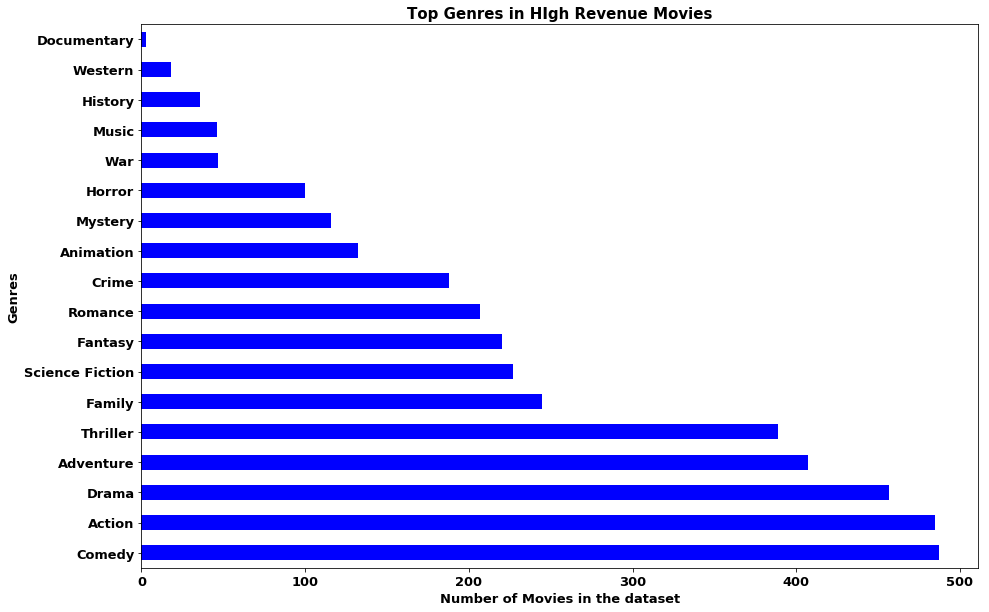

Comedy       487
Action       485
Drama        457
Adventure    407
Thriller     389
dtype: int64

In [379]:
#lets plot the points in descending order top to bottom as we have data in same format.
#genr.sort_values(ascending = False, inplace = True)

#ploting
genr. plot.barh(color = 'b', fontsize = 13)

#title
plt.title('Top Genres in HIgh Revenue Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in the dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Genres', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
genr.head()

> The above chart indicates Comedy genres play vital role in about 487 movies for the popularity. It is followed by Action and Drama. Adventure and Thriller genres also play vital rolse in popularity of the movie 

<a id='Question 3b'></a>
### Research Question 3: (Which Production Companies are top in Best Revenue movies?)

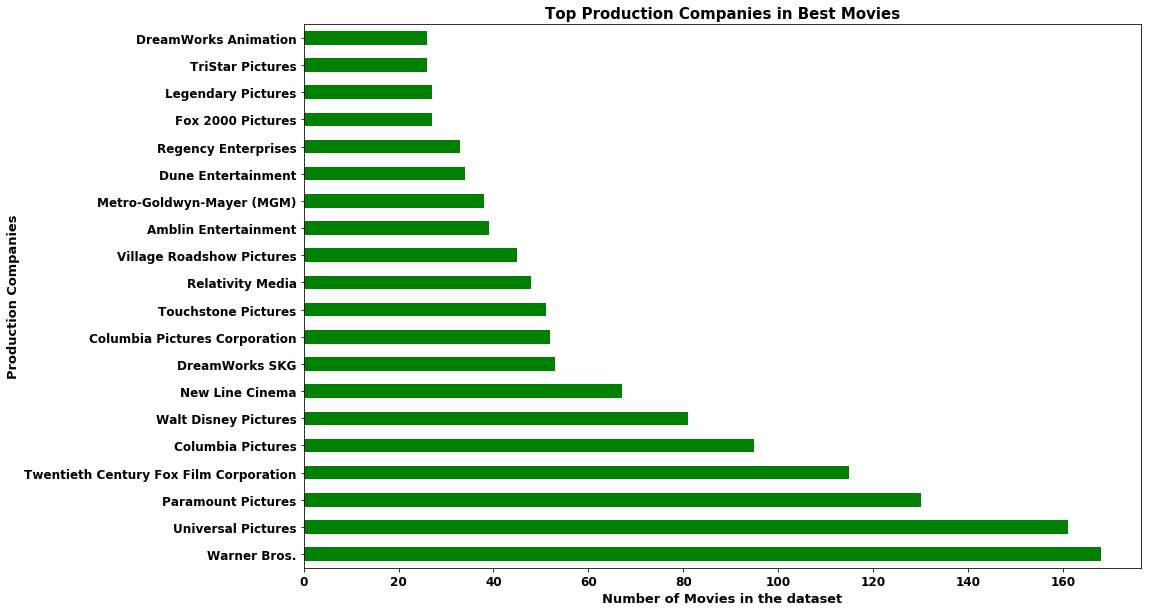

Warner Bros.                              168
Universal Pictures                        161
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    115
Columbia Pictures                          95
dtype: int64

In [380]:
#lets plot the points in descending order top to bottom as we have data in same format.

#prod.sort_values(ascending = False,inplace=True)

#ploting
prod.head(20).plot.barh(color = 'g', fontsize = 12)

#title
plt.title('Top Production Companies in Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in the dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Production Companies', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
prod.head()


> From above chart, it is clear that WarnerBrothers tops the list with high number of movies. it is followed by UNiversal Pictures and paramount pictures

<a id='Question 4b'></a>
### Research Question 4: (Which Actors are top in Best Revenue movies?)

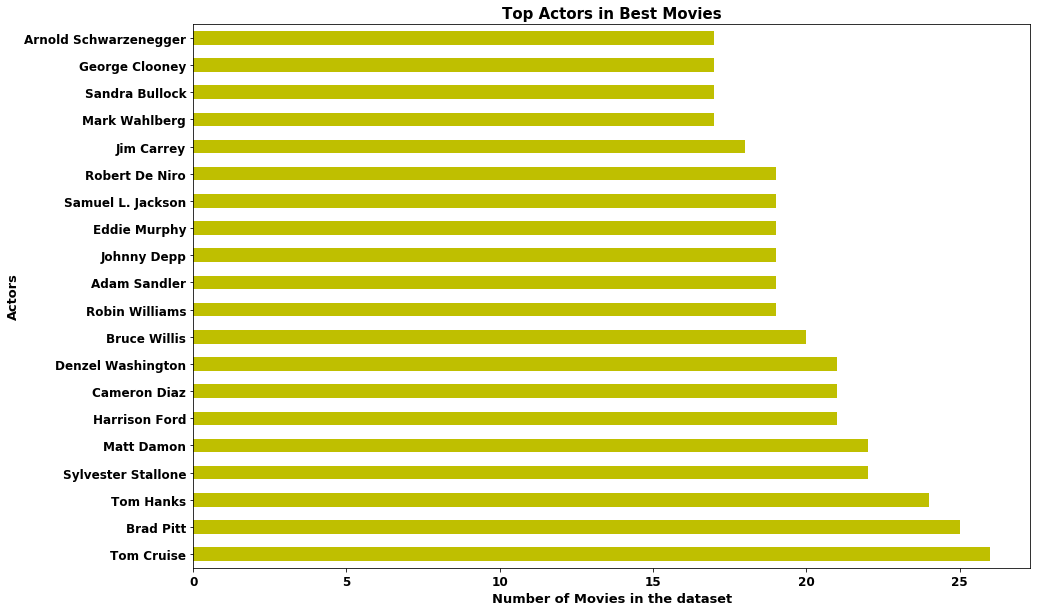

Tom Cruise            26
Brad Pitt             25
Tom Hanks             24
Sylvester Stallone    22
Matt Damon            22
dtype: int64

In [381]:
#lets plot the points in descending order top to bottom as we have data in same format.
#director.sort_values(ascending = False, inplace = True)

#ploting
casts.head(20).plot.barh(color = 'y', fontsize = 12)

#title
plt.title('Top Actors in Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in the dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Actors', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
casts.head()

Abvoe chart shows top actor Tom Cruise played 26 movies in high revenue movies. he is followed by Brad Pitt and Tom Hanks.

<a id='Question 5b'></a>
### Research Question 5: (Which directors are top in Best Revenue movies?)

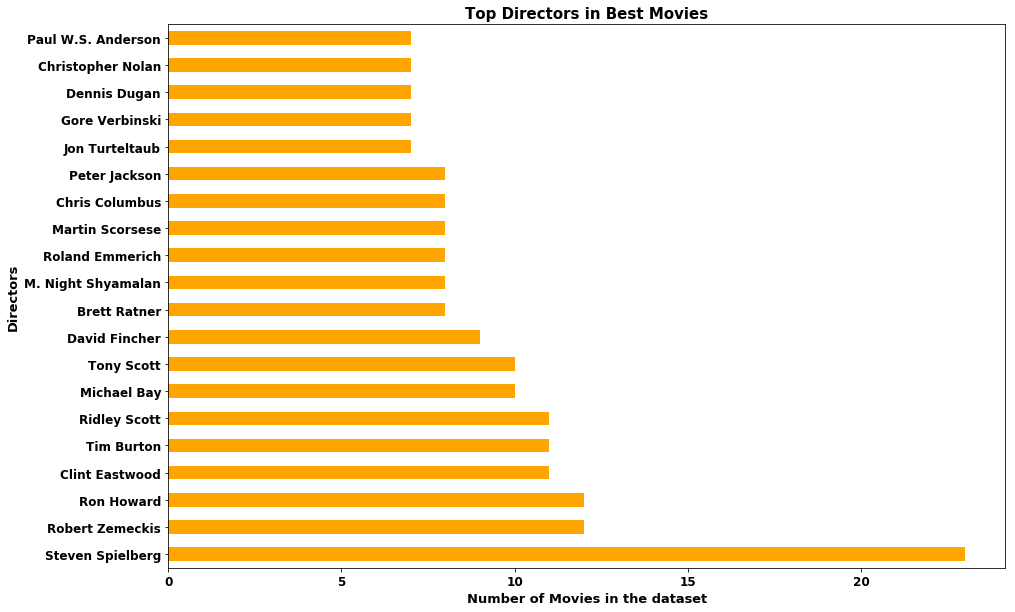

Steven Spielberg    23
Robert Zemeckis     12
Ron Howard          12
Clint Eastwood      11
Tim Burton          11
dtype: int64

In [382]:
#lets plot the points in descending order top to bottom as we have data in same format.
#director.sort_values(ascending = False, inplace = True)

#ploting
director.head(20).plot.barh(color = 'orange', fontsize = 12)

#title
plt.title('Top Directors in Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in the dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Directors', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
director.head()

> It is clear from the above chart that director Steven Spielberg tops the list with 23 movies in high revenue movies. He is followed by Ron Howard and Robert Zemeckis

<a id='Question 6b'></a>
### Research Question 6: (Which keywords are top in Best Revenue movies?)

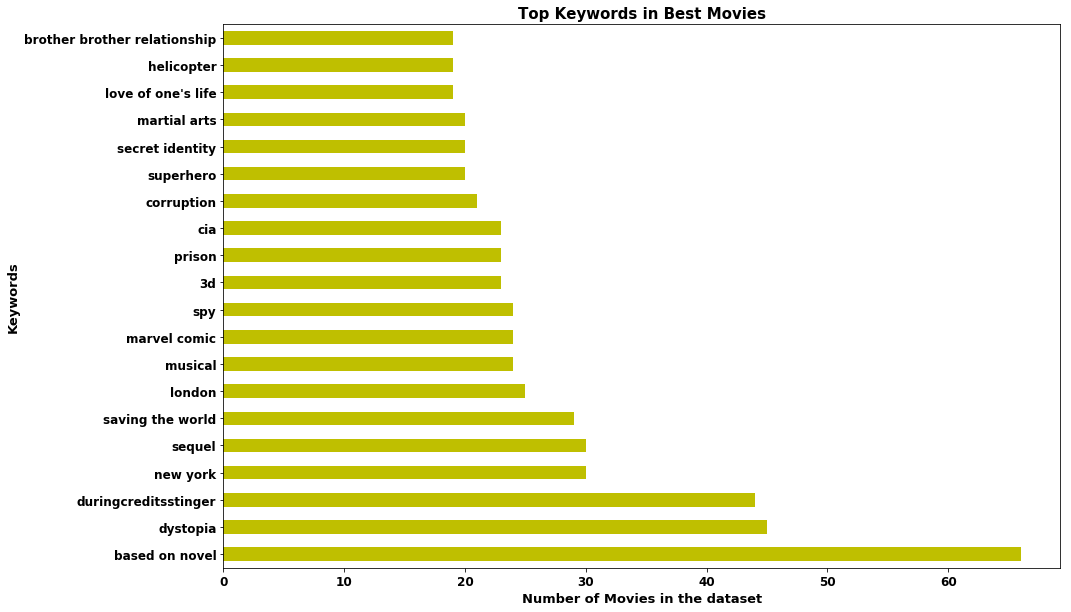

based on novel          66
dystopia                45
duringcreditsstinger    44
new york                30
sequel                  30
dtype: int64

In [383]:
#lets plot the points in descending order top to bottom as we have data in same format.
#director.sort_values(ascending = False, inplace = True)

#ploting
key.head(20).plot.barh(color = 'y', fontsize = 12)

#title
plt.title('Top Keywords in Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in the dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Keywords', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
key.head()

Above chart indicates that novel keyword plays important role in popular movies. 

<a id='Question 7b'></a>
### Research Question 7: (Which Genres are top during 60s and 2Ks Best Revenue movies?)

> IN order to find top generes during 60s and 2Ks , i selected high revenue movies from dataset for 60s and 2KS. 

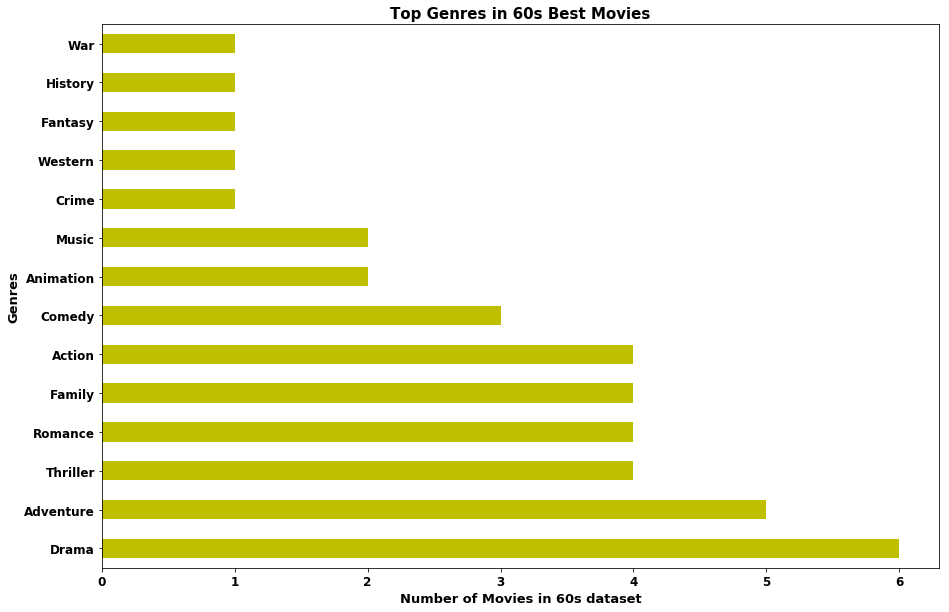

Drama        6
Adventure    5
Thriller     4
Romance      4
Family       4
Action       4
Comedy       3
Animation    2
Music        2
Crime        1
Western      1
Fantasy      1
History      1
War          1
dtype: int64


In [384]:
#  finding number of genres in 1960s

best_movies_60s_data = best_movies[best_movies['Year_Levels']=='60s']

best_movies_60s_genre= best_movies_60s_data['genres'].str.cat(sep = '|')


best_movie_60s_genre_words = pd.Series(best_movies_60s_genre.split('|'))


genre_60s= best_movie_60s_genre_words.value_counts()

#plotting
genre_60s.plot.barh(color = 'y', fontsize = 12)

#title
plt.title('Top Genres in 60s Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in 60s dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Genres', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
print(genre_60s)

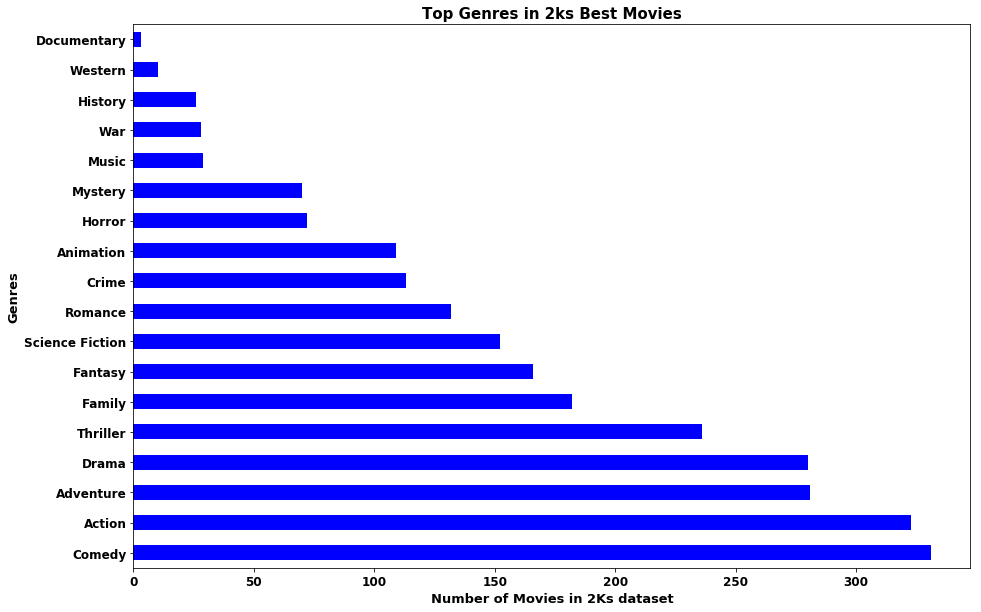

Comedy             331
Action             323
Adventure          281
Drama              280
Thriller           236
Family             182
Fantasy            166
Science Fiction    152
Romance            132
Crime              113
Animation          109
Horror              72
Mystery             70
Music               29
War                 28
History             26
Western             10
Documentary          3
dtype: int64


In [385]:
#  finding number of genres in 2Ks

best_movies_2Ks_data = best_movies[best_movies['Year_Levels']=='2Ks']

best_movies_2ks_genre= best_movies_2Ks_data['genres'].str.cat(sep = '|')

best_movie_2ks_genre_words = pd.Series(best_movies_2ks_genre.split('|'))

genre_2ks= best_movie_2ks_genre_words.value_counts()

#plotting
genre_2ks.plot.barh(color = 'b', fontsize = 12)

#title
plt.title('Top Genres in 2ks Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in 2Ks dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Genres', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
print(genre_2ks)

> Above plot shows the 60s and 2Ks, top genres in best movies. It shows during 60s drama was popular. During 2Ks Comedy was popular. 60s dataset is less compared to 2Ks.

<a id='Question 8b'></a>
### Research Question 8: (Which Keywords are top during 60s and 2Ks Best Revenue movies?)

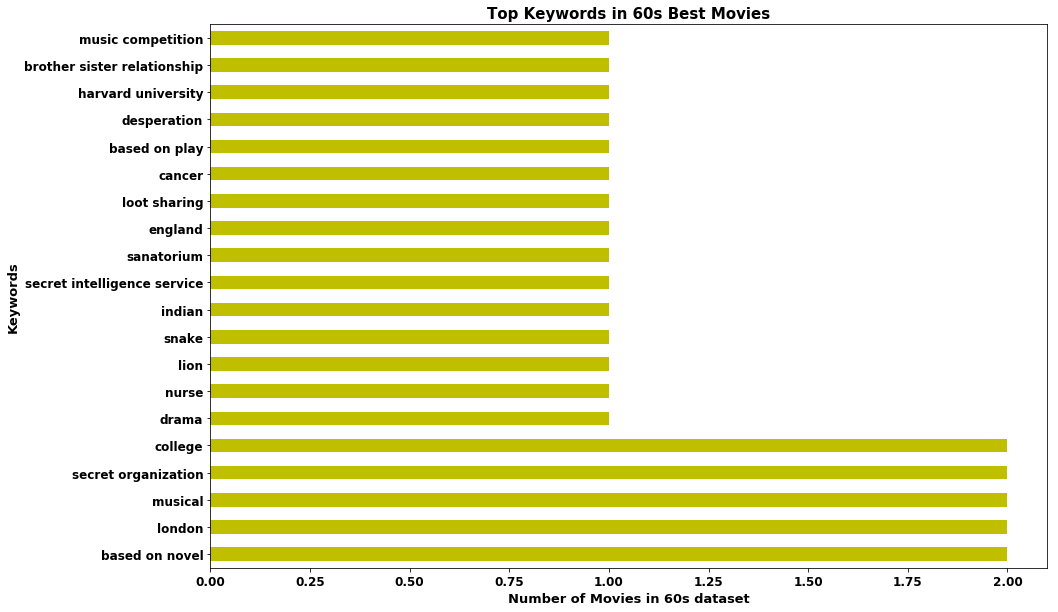

based on novel                          2
london                                  2
musical                                 2
secret organization                     2
college                                 2
drama                                   1
nurse                                   1
lion                                    1
snake                                   1
indian                                  1
secret intelligence service             1
sanatorium                              1
england                                 1
loot sharing                            1
cancer                                  1
based on play                           1
desperation                             1
harvard university                      1
brother sister relationship             1
music competition                       1
animation                               1
florida                                 1
dog                                     1
snow storm                        

In [386]:
#  finding number of keywords in 1960s

best_movies_60s_data = best_movies[best_movies['Year_Levels']=='60s']

best_movies_60s_keywords = best_movies_60s_data['keywords'].str.cat(sep = '|')

best_movie_60s_keywords_words = pd.Series(best_movies_60s_keywords.split('|'))

keywords_60s= best_movie_60s_keywords_words.value_counts()

#plotting
keywords_60s.head(20).plot.barh(color = 'y', fontsize = 12)

#title
plt.title('Top Keywords in 60s Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in 60s dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Keywords', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
print(keywords_60s)


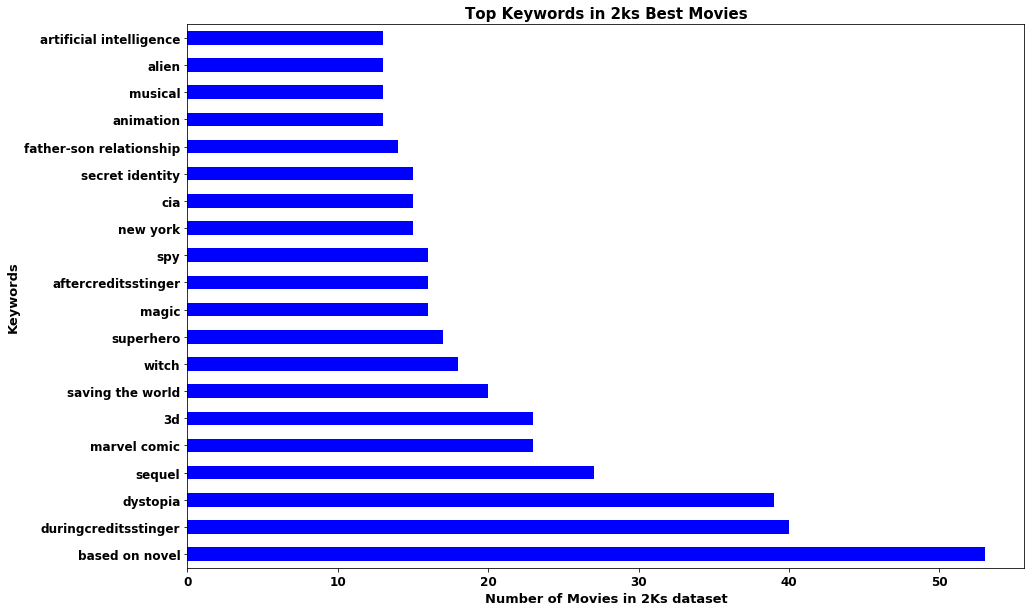

based on novel              53
duringcreditsstinger        40
dystopia                    39
sequel                      27
marvel comic                23
3d                          23
saving the world            20
witch                       18
superhero                   17
magic                       16
aftercreditsstinger         16
spy                         16
new york                    15
cia                         15
secret identity             15
father-son relationship     14
animation                   13
musical                     13
alien                       13
artificial intelligence     13
future                      13
monster                     12
love of one's life          12
assassin                    12
undercover                  12
paris                       12
prison                      11
corruption                  11
biography                   11
secret                      11
                            ..
southeast asia               1
descenda

In [387]:
#  finding number of keywords in 2Ks

best_movies_2Ks_data = best_movies[best_movies['Year_Levels']=='2Ks']

best_movies_2ks_keywords= best_movies_2Ks_data['keywords'].str.cat(sep = '|')

best_movie_2ks_keywords_words = pd.Series(best_movies_2ks_keywords.split('|'))

keywords_2ks= best_movie_2ks_keywords_words.value_counts()

#plotting
keywords_2ks.head(20).plot.barh(color = 'b', fontsize = 12)

#title
plt.title('Top Keywords in 2ks Best Movies',fontsize = 15,weight='bold')

# on x axis
plt.xlabel('Number of Movies in 2Ks dataset', color = 'black', fontsize = 13, weight = 'bold')
plt.ylabel('Keywords', color = 'black', fontsize = 13, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#ploting the graph
plt.show()
print(keywords_2ks)

> Above plot shows the 60s and 2Ks, top keywords in best movies. It shows during 60s keyword "london" was popular. During 2Ks keyword "based on novel" was popular. 60s dataset is less compared to 2Ks.

<a id='conclusions'></a>
## Conclusions

### General Explore

> Here, I explored some general questions. overall, budget increased over the period of time. Particularly from 1995 onwards, budget of the movie were increased double. Similarly revenue also increased over the period of time. Overall the mean popularity increases slowly with time. It is due to number of people watching movies and voting from various sources increased over the period of time. Surprisingly the average vote trend is decreasing slowly over the period of time. The Reason for the decreasing trend may be due to applying strict filter to the vote average over the period of time inorder to get accurate average vote. The drastic increase in number of movies released over the period of time. During economic downtime, the number of movies released were less. After 2005, the number of movies released were so high compared to 60s to 90s.This may be due to growth in economy and increase in number of people watching movies through different platforms all over the world. Maximum number of movies are produced with mean runtime of 103 min. 

### Properties Associated with Successful Movies

> At this part, I found out the properties that are associated with high popularity movies. HIgh budget movies are in high popularity level compared to low budget movies. Similarly, HIgh revenue movies are in high popularity level compared to low revenue movies. HIgh runtime movies are in high popularity level compared to low runtime movies. popular movies are largely associated with high BUdget movies and the high runtime movies. HIgh runtime has high voting average compared to low runtime movies. 

> Comedy genres play vital role in about maximum number of movies for the popularity. It is followed by Action and Drama. Adventure and Thriller genres also play vital rolse in popularity of the movie. Production company "Warner Brothers" tops the list with high number of movies. It is followed by UNiversal Pictures and paramount pictures. Actor "Tom Cruise" played maximum number of movies in high revenue popularity movies. He is followed by Brad Pitt and Tom Hanks. Director "Steven Spielberg" tops the list with maximum number of movies in high revenue popularity movies. He is followed by Ron Howard and Robert Zemeckis. Novel keyword plays important role in popular movies

> During 60s, genre Drama was popular, but during 2Ks Comedy genre was popular. Similarly, during 60s, keyword "london" was popular, but during 2Ks keyword "based on novel" was popular.




<a id='limitations'></a>
## Limitations

1. Data quality: Some Values in BUdget and revenue columns are very small number with value less than 100. Some revenue and budget columns are having zero values and missing. I assume the zero values in revenue and budget column are missing, there are still a lot of unreasonable small/big value in the both of the columns. 

2. As per TMDb, the popularity doesn't have the upperbound , but it actually have the high probability of having outliers. 

3. Units of revenue and budget column: It is not sure whether the budget and revenue columns are in US dollar or not. 

4. The inflation effect: I used the revenue and budget data to explore and I didn't use the adjusted data due to inflation.

5. I dicussed the properties are associated with successful movies. The successful I defined here are high revenue. But I didn't find the properties of high popularity and voting score. I just assume the high revenue level are with higher popularity, which I found in general exploration part. 

6. The categorical data, when I analysed them, I just split them one by one, and count them one by one. But the thing is, there must be some effect when these words combine. For example, the keyword based on novel is popular, but what truly keyword that makes the movie sucess maybe the based on novel&adventure.


In [388]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0